In [ ]:
!pip install wordcloud
 
from wordcloud import WordCloud, STOPWORDS


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
!pip install wikipedia
import wikipedia

 

  Created wheel for wikipedia: filename=wikipedia-1.4.0-cp37-none-any.whl size=11686 sha256=e989791926828e0b028c6a11bf4e0da4cb8b9cf60a62efbd761cf90fabca2c3d
  Stored in directory: /root/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia


In [ ]:
def get_wiki(query):
  title=wikipedia.search(query)[0]
  page=wikipedia.page(title)
  return page.content

In [ ]:
 
text=get_wiki('python programming language')
print(text)

Python is an interpreted, high-level and general-purpose programming language. Python's design philosophy emphasizes code readability with its notable use of significant indentation. Its language constructs and object-oriented approach aim to help programmers write clear, logical code for small and large-scale projects.Python is dynamically-typed and garbage-collected. It supports multiple programming paradigms, including structured (particularly, procedural), object-oriented and functional programming. Python is often described as a "batteries included" language due to its comprehensive standard library.Guido van Rossum began working on Python in the late 1980's, as a successor to the ABC programming language, and first released it in 1991 as Python 0.9.0. Python 2.0 was released in 2000 and introduced new features, such as list comprehensions and a garbage collection system using reference counting and was discontinued with version 2.7.18 in 2020. Python 3.0 was released in 2008 and 

In [ ]:
#generate the wordcloud
wc=WordCloud().generate(text)


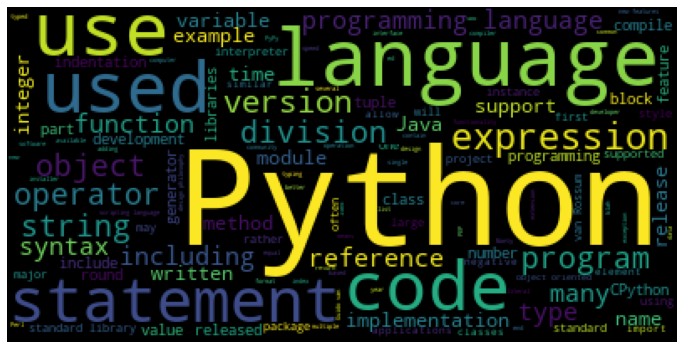

In [ ]:
#plot the wordcloud
plt.figure(figsize=(12,12))
plt.imshow(wc)
#remove axis
plt.axis("off")
plt.show()

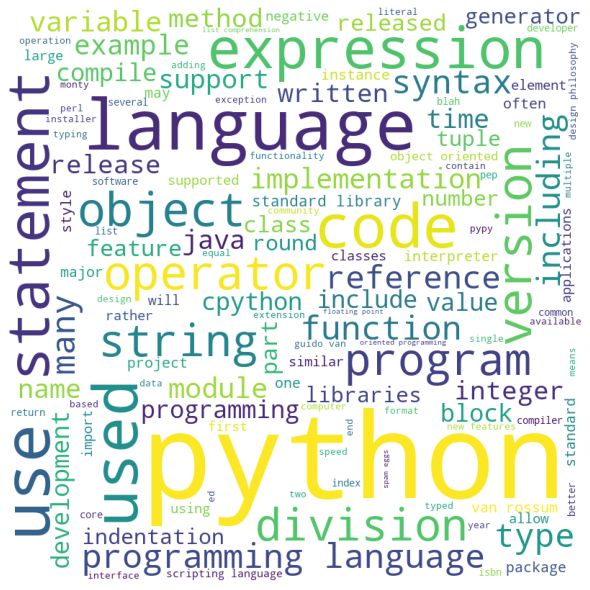

In [ ]:

comment_words = '' 
stopwords = set(STOPWORDS) 
# split the  text 
tokens = text.split() 
# Converts each token into lowercase 
for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

Connecting Colab with Google Drive
To create the word cloud, you need a text file, which you can upload directly to Google Drive, and import it to the Colab environment. The function below does that for you:

In [ ]:
def google_authenticate():
  # Authenticate first so the Google Drive library can detect your credentials.
  from google.colab import auth
  auth.authenticate_user()

  from googleapiclient.discovery import build
  drive_service = build('drive', 'v3')
  return drive_service

When you run the command below, you will be provided a link that will authenticate your account and request access to your Google Drive.



In [ ]:
drive_service = google_authenticate()


'''
from google.colab import drive
drive.mount('/content/drive')
'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

Read a Text File into Colab
After authenticating your Google Drive, now you can import text files and operate on them directly through Colab.

The function below allows you to read the text file which you will use to create the word cloud:

In [ ]:
def read_file(file_id):
  """ 
  Download file from Google Drive 
  Argument: file_id
  Returns: downloaded file
  """
  
  file_id = file_id

  import io
  from googleapiclient.http import MediaIoBaseDownload

  request = drive_service.files().get_media(fileId=file_id)
  downloaded = io.BytesIO()
  downloader = MediaIoBaseDownload(downloaded, request)
  done = False
  while done is False:
    # _ is a placeholder for a progress object that we ignore.
    # (Our file is small, so we skip reporting progress.)
    _, done = downloader.next_chunk()

  downloaded.seek(0)
  return downloaded
  #print 'Downloaded file contents are:', downloaded.read()

With the wordcloud library you can also generate customized word clouds based on an image silhouette. These type of clouds are also called masked word clouds. To do this, you will first need to upload a silhouette image of your choice to Google Drive. Then you can get the file id from the shareable link similar to what we did for our text file (see animation above). You can get a silhouette image directly from Google Images.

The code below takes care of generating the masked word cloud:

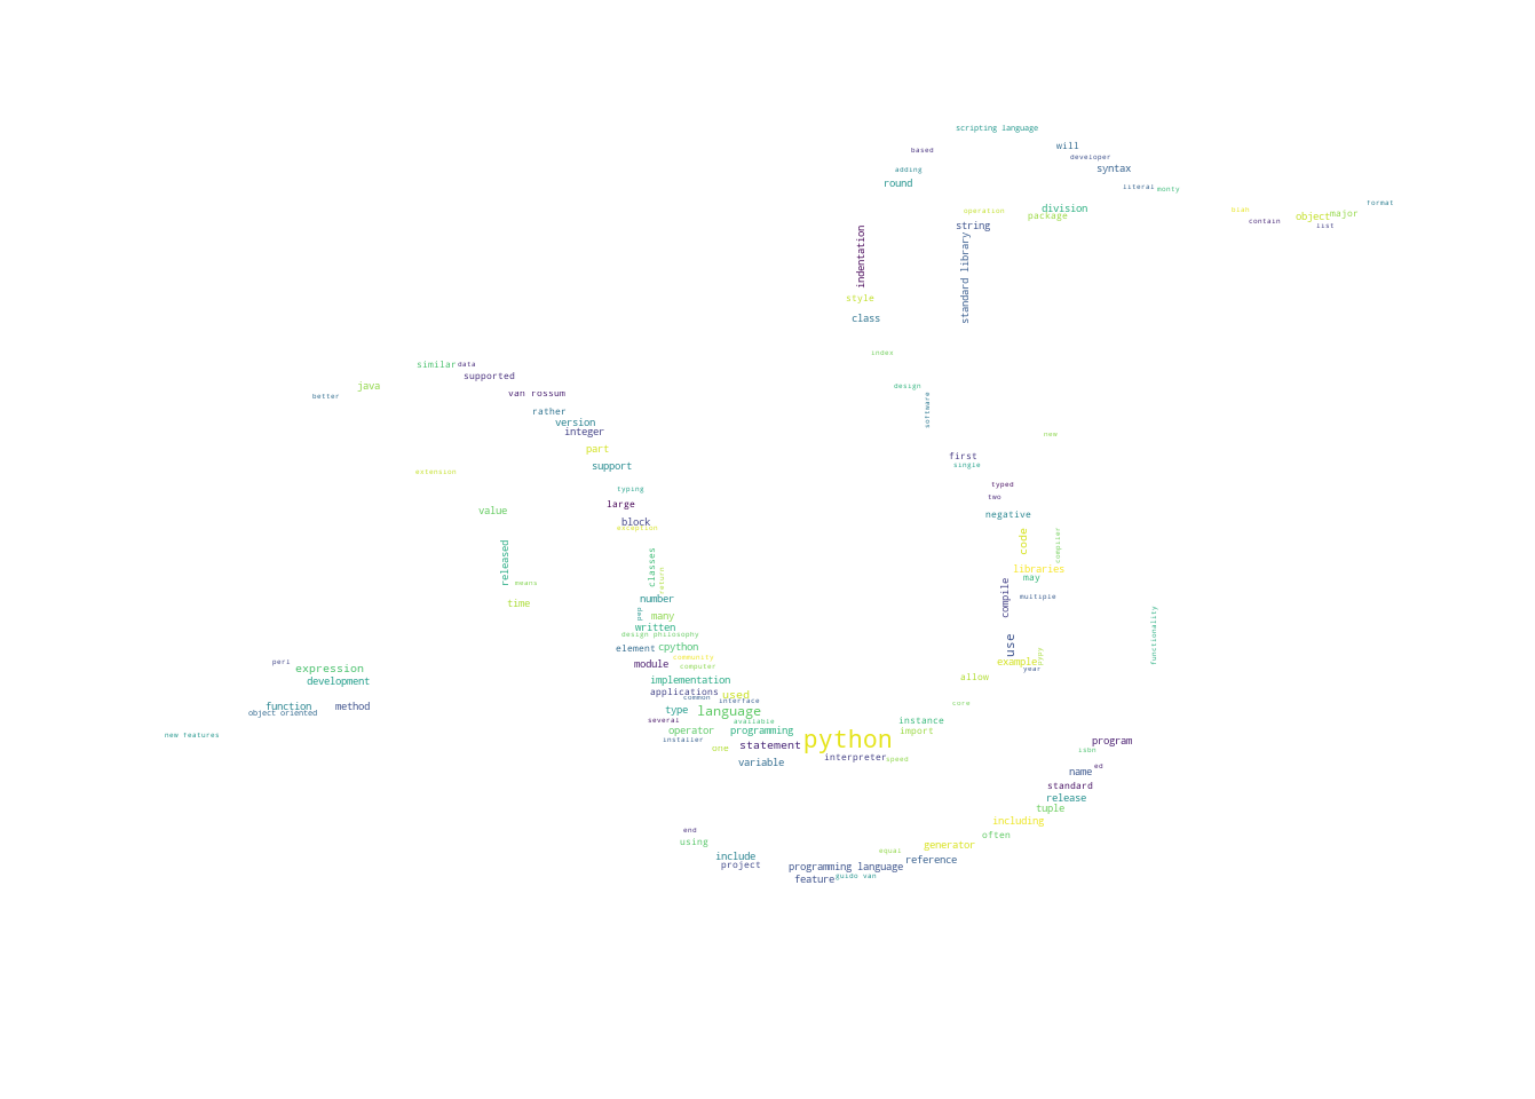

In [ ]:
image_file=read_file("1N76J_ckb8lmR6tZ9iZe6tbjf951jqlPh")
import numpy as np
from PIL import Image


# create mask
python_mask = np.array(Image.open(image_file))

# remove stopwords
stopwords = set(STOPWORDS)
stopwords.add("said")

# generate word cloud
wc = WordCloud(background_color="white", max_words=2000, min_font_size=5, mask=python_mask,
               stopwords=stopwords)
wc.generate(comment_words)

# plot the word cloud
plt.figure(figsize=(8,6), dpi=240)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()